<a href="https://colab.research.google.com/github/rakenny1985/THA4/blob/master/THA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
file= 'Data_Extract_From_World_Development_Indicators-4.xlsx'
xl=pd.ExcelFile(file)
df1=xl.parse()
df1.columns = df1.columns.str.replace('Country Name','recipient_condensed')
df1.columns = df1.columns.str.replace('2014 [YR2014]','gdp_per_capita')
df1.head() #importing first dataframe

,Series Name,Series Code,recipient_condensed,Country Code,gdp_per_capita
0,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Algeria,DZA,4675.89
1,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Djibouti,DJI,..
2,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Libya,LBY,6697.1
3,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Tunisia,TUN,4271.33
4,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Morocco,MAR,3113.8


In [74]:
file2= 'AidData_GlobalChineseOfficialFinanceDataset_v1.0_RK_Edits_v1.xlsx'
xl=pd.ExcelFile(file2)
df2=xl.parse()
df2.head(5) #importing second data frame



,unique_id_totals_year,project_id,recommended_for_research,umbrella,year,donor,funding_agency,implementing_agency,recipient_condensed,title,...,is_ground_truthing,loan_type,interest_rate,maturity,grace_period,grant_element,location_details,contacts,source_triangulation,field_completeness
0,2010Mauritania,1,True,0,2010,China,"Unspecified Chinese Government Institution, Go...",NaN,Mauritania,29th medical team to Mauritania to assist loca...,...,False,NaN,,,,NaN,NaN,"Zhang Xun, ; Cheikh Ould Horma,",3,6
1,2008Mauritania,3,True,0,2008,China,"Export-Import Bank of China, Government Agency",China Communications Construction Company (CCC...,Mauritania,China issues 2 billion yuan loan to fund Port ...,...,False,Concessional,2,20,5,54.08,Nouakchott,"Zhai Jun, ; Zhang Xun, ; Mohamed Ould Abdel Az...",8,8
2,2001Angola,6,True,0,2001,China,"Unspecified Chinese Government Institution, Go...",NaN,Angola,"China grants $600,000 USD in food aid for floo...",...,False,NaN,,,,NaN,Bie Province,"Albino Malungo,",0,7
3,2000Angola,10,True,0,2000,China,"Unspecified Chinese Government Institution, Go...",NaN,Angola,China commits to train Angolan magistrates,...,False,NaN,,,,NaN,NaN,"Domingos Culolo, ; Jiang Quyong,",0,5
4,2001Angola,13,True,0,2001,China,"Unspecified Chinese Government Institution, Go...",NaN,Angola,Computers and Sewing Machines,...,False,NaN,,,,NaN,NaN,"Jiang Yuande,",0,6


In [75]:
df2.columns
#figuring out column names - there are alot

Index(['unique_id_totals_year', 'project_id', 'recommended_for_research',
       'umbrella', 'year', 'donor', 'funding_agency', 'implementing_agency',
       'recipient_condensed', 'title', 'description', 'status', 'flow',
       'flow_class', 'intent', 'amount', 'currency', 'usd_defl_2014',
       'usd_current', 'crs_sector_code', 'crs_sector_name', 'sources',
       'sources_count', 'cofinancing_agency', 'recipient_agencies',
       'recipient_agencies_count', 'deflators_used', 'exchange_rates_used',
       'start_actual', 'start_planned', 'end_actual', 'end_planned',
       'year_uncertain', 'all_recipients', 'recipient_count',
       'recipient_cow_code', 'recipient_oecd_code', 'recipient_oecd_name',
       'recipient_iso3', 'recipient_iso2', 'recipient_un_code',
       'recipient_imf_code', 'recipient_region', 'line_of_credit',
       'is_cofinanced', 'is_ground_truthing', 'loan_type', 'interest_rate',
       'maturity', 'grace_period', 'grant_element', 'location_details',
       

In [76]:
aid = df2[['unique_id_totals_year','recipient_condensed','year','flow_class','crs_sector_name','usd_defl_2014' ]]
aid.head(5)
#new condensed df

,unique_id_totals_year,recipient_condensed,year,flow_class,crs_sector_name,usd_defl_2014
0,2010Mauritania,Mauritania,2010,ODA-like,Health,
1,2008Mauritania,Mauritania,2008,ODA-like,Transport and Storage,3.96886e+08
2,2001Angola,Angola,2001,ODA-like,Emergency Response,1.36409e+06
3,2000Angola,Angola,2000,ODA-like,Government and Civil Society,
4,2001Angola,Angola,2001,ODA-like,Government and Civil Society,


In [77]:
aid.dtypes

unique_id_totals_year    object
recipient_condensed      object
year                      int64
flow_class               object
crs_sector_name          object
usd_defl_2014            object
dtype: object

In [78]:
import numpy as np
table = pd.pivot_table(aid, values='usd_defl_2014', index=['recipient_condensed', 'year'],columns=['flow_class'], aggfunc=np.sum, fill_value=0)
print(table)
#trying to pivot - not the easiest

flow_class                                 ODA-like     OOF-like  \
recipient_condensed year                                           
Africa, regional    2000 usd_defl_2014                         0   
                    2002 usd_defl_2014                         0   
                    2003 usd_defl_2014                         0   
                    2004 usd_defl_2014                         0   
                    2005 usd_defl_2014            0            0   
                    2006 usd_defl_2014            0            0   
                    2008 usd_defl_2014                         0   
                    2010 usd_defl_2014                         0   
                    2011 usd_defl_2014            0  2.21997e+07   
                    2012 usd_defl_2014            0            0   
                    2013 usd_defl_2014   4.2907e+08                
                    2014 usd_defl_2014            0            0   
Algeria             2002 usd_defl_2014          

In [79]:
merged = pd.merge(df1, aid, how="left", on="recipient_condensed")
merged.tail(20)
#merging 2 dataframes

,Series Name,Series Code,recipient_condensed,Country Code,gdp_per_capita,unique_id_totals_year,year,flow_class,crs_sector_name,usd_defl_2014
2236,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Zimbabwe,ZWE,1086.87,2012Zimbabwe,2012.0,ODA-like,Health,52951.8
2237,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Zimbabwe,ZWE,1086.87,2005Zimbabwe,2005.0,ODA-like,Health,
2238,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Zimbabwe,ZWE,1086.87,2002Zimbabwe,2002.0,ODA-like,Health,
2239,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Zimbabwe,ZWE,1086.87,2011Zimbabwe,2011.0,OOF-like,Business and Other Services,1.10999e+07
2240,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Zimbabwe,ZWE,1086.87,2014Zimbabwe,2014.0,ODA-like,Communications,218000000
2241,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Zimbabwe,ZWE,1086.87,2014Zimbabwe,2014.0,ODA-like,Health,89000000
2242,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Zimbabwe,ZWE,1086.87,2014Zimbabwe,2014.0,ODA-like,Education,
2243,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Zimbabwe,ZWE,1086.87,2014Zimbabwe,2014.0,ODA-like,Education,
2244,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Zimbabwe,ZWE,1086.87,2014Zimbabwe,2014.0,OOF-like,Energy Generation and Supply,319000000
2245,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Zimbabwe,ZWE,1086.87,2014Zimbabwe,2014.0,ODA-like,Energy Generation and Supply,


In [80]:
merged.drop(['Series Name', 'Series Code'], axis=1)
#dropping unnecessary columns

,recipient_condensed,Country Code,gdp_per_capita,unique_id_totals_year,year,flow_class,crs_sector_name,usd_defl_2014
0,Algeria,DZA,4675.89,2003Algeria,2003.0,OOF-like,Communications,
1,Algeria,DZA,4675.89,2002Algeria,2002.0,ODA-like,Government and Civil Society,6.78053e+06
2,Algeria,DZA,4675.89,2010Algeria,2010.0,ODA-like,Other Social infrastructure and services,5.57303e+07
3,Algeria,DZA,4675.89,2002Algeria,2002.0,ODA-like,Health,
4,Algeria,DZA,4675.89,2002Algeria,2002.0,Vague (Official Finance),"Industry, Mining, Construction",
5,Algeria,DZA,4675.89,2011Algeria,2011.0,ODA-like,"Agriculture, Forestry and Fishing",
6,Algeria,DZA,4675.89,2008Algeria,2008.0,ODA-like,Education,
7,Djibouti,DJI,..,2008Djibouti,2008.0,ODA-like,Unallocated / Unspecified,3.4139e+06
8,Djibouti,DJI,..,2001Djibouti,2001.0,OOF-like,Communications,2.7391e+07
9,Djibouti,DJI,..,2001Djibouti,2001.0,ODA-like,Government and Civil Society,5.47911e+06


In [98]:
file= 'aid_data_totals_v1.xlsx'
xl=pd.ExcelFile(file)
df3=xl.parse() #frustrated by pivot function, I uploaded a new excel that is pivoted to get total commitments by year
#not ideal way but I am out of time!

df3.head() 
merged2 = pd.merge(df1, df3, how="left", on="recipient_condensed")

merged2
#new merged with df1 and new pivoted df


,Series Name,Series Code,recipient_condensed,Country Code,gdp_per_capita,commitments
0,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Algeria,DZA,4675.89,6.251087e+07
1,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Djibouti,DJI,..,7.447504e+08
2,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Libya,LBY,6697.1,4.105654e+08
3,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Tunisia,TUN,4271.33,4.500270e+07
4,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Morocco,MAR,3113.8,1.025288e+09
5,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Angola,AGO,3846.24,1.655638e+10
6,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Benin,BEN,833.641,4.193939e+08
7,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Botswana,BWA,7574.28,1.353219e+09
8,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Burkina Faso,BFA,639.71,NaN
9,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Burundi,BDI,244.149,3.486750e+08


In [89]:
merged2.dtypes

Series Name             object
Series Code             object
recipient_condensed     object
Country Code            object
gdp_per_capita          object
commitments            float64
dtype: object

In [0]:
merged2['gdp_per_capita'] = pd.to_numeric(merged2['gdp_per_capita'],errors='coerce')

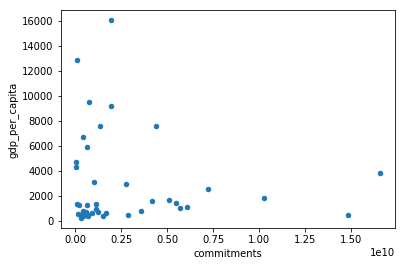

In [101]:
import matplotlib.pyplot as plt
import numpy as np
ax=merged2.plot.scatter (y='gdp_per_capita', x='commitments')
#created scatter plot - couple interesting looking outliers here

In [102]:
merged2.describe()
#a bit of descriptive stats

,gdp_per_capita,commitments
count,50.000000,4.600000e+01
mean,3126.124388,2.443929e+09
std,4519.420353,3.633518e+09
min,244.148863,3.145617e+07
25%,612.810236,4.212057e+08
50%,1306.507921,8.279583e+08
75%,3727.091360,2.846699e+09
max,23676.032363,1.655638e+10


In [103]:
merged2.sort_values('commitments')
#answer for lowest Chinese aid commitments

,Series Name,Series Code,recipient_condensed,Country Code,gdp_per_capita,commitments
45,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Somalia,SOM,NaN,3.145617e+07
3,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Tunisia,TUN,4271.326849,4.500270e+07
0,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Algeria,DZA,4675.885024,6.251087e+07
43,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Seychelles,SYC,12850.493149,9.437256e+07
14,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Comoros,COM,1369.185646,9.904587e+07
26,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Guinea-Bissau,GNB,544.882470,1.503653e+08
28,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Lesotho,LSO,1309.749580,1.919362e+08
9,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Burundi,BDI,244.148863,3.486750e+08
29,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Liberia,LBR,582.059420,3.625878e+08
47,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,South Sudan,SSD,NaN,4.029114e+08


In [104]:
merged2.sort_values(by=['commitments'], ascending=False)
#answer for highest chinese aid commitments

,Series Name,Series Code,recipient_condensed,Country Code,gdp_per_capita,commitments
5,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Angola,AGO,3846.240911,1.655638e+10
21,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Ethiopia,ETH,452.778236,1.483371e+10
48,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Sudan,SDN,1837.138362,1.023677e+10
39,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Nigeria,NGA,2563.092124,7.239325e+09
53,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Zimbabwe,ZWE,1086.873532,6.088962e+09
27,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Kenya,KEN,1075.659460,5.701952e+09
11,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Cameroon,CMR,1428.215673,5.484177e+09
24,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Ghana,GHA,1642.423475,5.125438e+09
46,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,South Africa,ZAF,7583.589509,4.399273e+09
52,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,Zambia,ZMB,1620.823290,4.180388e+09
